# Masterclass Embeddings
## Hands on - (Quantile) normalization of data sets
#### Rijkswaterstaat | Datalab | E.Taskesen | T.Schouten | May 2020

### Batch-effect exercise

In statistics, quantile normalization is a technique for making two distributions identical in statistical properties.
Clustering techniques will see the batch effect as an seperation of the data

In [1]:
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.preprocessing import quantile_transform
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [ ]:
# Make random data sets with 3 classes
[X, labels_true] = make_blobs(n_samples=1000, centers=3, n_features=100)

In [17]:
# Dimensionality reduction to view the sample-sample relationships
X_embedded = TSNE(n_components=2, verbose=1).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.118s...
[t-SNE] Computed neighbors for 1000 samples in 0.547s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.220834
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.505890
[t-SNE] KL divergence after 1000 iterations: 1.288880


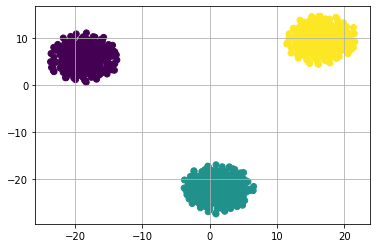

In [10]:
# Show the raw data
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=labels_true)
plt.grid(True)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.116s...
[t-SNE] Computed neighbors for 1000 samples in 0.498s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.220834
[t-SNE] Computed conditional probabilities in 0.256s
[t-SNE] Iteration 50: error = 66.8836136, gradient norm = 0.3487341 (50 iterations in 1.226s)
[t-SNE] Iteration 100: error = 68.9421158, gradient norm = 0.2843418 (50 iterations in 1.155s)
[t-SNE] Iteration 150: error = 66.8375168, gradient norm = 0.3031957 (50 iterations in 1.223s)
[t-SNE] Iteration 200: error = 66.9514084, gradient norm = 0.2993997 (50 iterations in 1.216s)
[t-SNE] Iteration 250: error = 67.0282822, gradient norm = 0.2939200 (50 iterations in 1.144s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.028282
[t-SNE] Iteration 300: error = 1.5430659, gradient norm = 0.0058786 (50 iterations in 1.078s)
[t-SNE] Iteration 350: error = 1.3606331, gradient norm = 0.00203

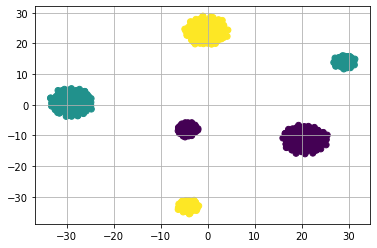

In [13]:
# Idea: You received data sets from two different sensors.
# Include batch-effect at every class

X[np.where(labels_true==1)[0][0:100],:] = X[np.where(labels_true==1)[0][0:100],:]+5
X[np.where(labels_true==2)[0][0:100],:] = X[np.where(labels_true==2)[0][0:100],:]+5
X[np.where(labels_true==0)[0][0:100],:] = X[np.where(labels_true==0)[0][0:100],:]+5

# Scatter the batch effect
X_embedded_batch = TSNE(n_components=2, verbose=3).fit_transform(X)
plt.scatter(X_embedded_batch[:,0],X_embedded_batch[:,1], c=labels_true)
plt.grid(True)


In [14]:
# Quantile normalization to remove batch effect
Xquantile = quantile_transform(X, axis=1)

c:\users\erdogant\miniconda3\envs\env_masterclass\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.090s...
[t-SNE] Computed neighbors for 1000 samples in 0.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.159650
[t-SNE] Computed conditional probabilities in 0.264s
[t-SNE] Iteration 50: error = 70.9953156, gradient norm = 0.3596441 (50 iterations in 1.294s)
[t-SNE] Iteration 100: error = 70.9934464, gradient norm = 0.3307741 (50 iterations in 1.303s)
[t-SNE] Iteration 150: error = 71.7772217, gradient norm = 0.3245611 (50 iterations in 1.237s)
[t-SNE] Iteration 200: error = 73.1472473, gradient norm = 0.3043538 (50 iterations in 1.325s)
[t-SNE] Iteration 250: error = 72.8232498, gradient norm = 0.2869028 (50 iterations in 1.405s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.823250
[t-SNE] Iteration 300: error = 2.0378203, gradient norm = 0.0048226 (50 iterations in 1.279s)
[t-SNE] Iteration 350: error = 1.8374346, gradient norm = 0.00340

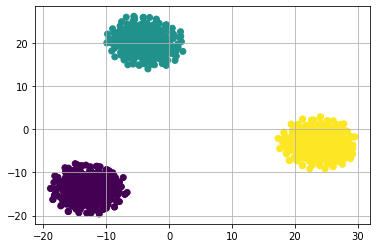

In [15]:
# Scatter the batch effect
X_embedded_Q = TSNE(n_components=2, verbose=3).fit_transform(Xquantile)
plt.scatter(X_embedded_Q[:,0],X_embedded_Q[:,1], c=labels_true)
plt.grid(True)

In [ ]:
# Fin